# Programming Tutorial, Day 2
Part of the *Better With Scattering* Workshop by www.bam.de

## Working with files and folders

### Let Python show us the current working directory this script is running from.
The output depends on where you stored the notebook file and it will be different for everyone.

### Old Style File and Folders

In [62]:
import os
# show the current working directory
os.getcwd()

'/content'

In [63]:
# list the contents of the *sample_data* subdirectory
os.path.join('sample_data', os.listdir('sample_data')[1])

'sample_data/README.md'

### Newer style for files and folders
Working with *Path* objects.

In [55]:
from pathlib import Path
cwd = Path().absolute()
cwd

PosixPath('/content')

In [56]:
cwd/'sample_data'

PosixPath('/content/sample_data')

#### List the contents of the *sample_data* directory.

In [57]:
[fn for fn in (cwd/'sample_data').iterdir()
         if fn.name.endswith(".csv")]

[PosixPath('/content/sample_data/california_housing_train.csv'),
 PosixPath('/content/sample_data/mnist_train_small.csv'),
 PosixPath('/content/sample_data/mnist_test.csv'),
 PosixPath('/content/sample_data/california_housing_test.csv')]

### Download the sample measurement data file

In [61]:
# Downloading something to this working environment
#!wget https://github.com/BAMresearch/jupyter_tutorial_sas/raw/main/data/Ag_N008.dat

In [64]:
# Test if the file exists
fn = "Ag_N008.dat"
Path(fn).is_file()

True

In [65]:
# Filter out the data file from the listing of the current working directory
fnData = [fn for fn in (cwd).iterdir()
             if fn.name.endswith(".dat")][0]
fnData

PosixPath('/content/Ag_N008.dat')

## Loading some data
Introduction *DataFrame* from *pandas* module

In [37]:
import pandas
dataframe = pandas.read_csv(fnData, sep='\s+', names=("q", "I", "uI"))
dataframe

,q,I,uI
0,0.030259,4769.301045,1655.363275
1,0.030719,5346.031551,2218.324041
2,0.031096,6387.856371,1534.356131
3,0.031611,2986.364914,1984.290104
4,0.032103,5634.075856,1367.733213
...,...,...,...
530,14.165907,0.036509,0.024799
531,14.334260,0.019789,0.024856
532,14.504613,0.036952,0.024934
533,14.676991,0.053573,0.025039


In [39]:
dataframe.I

0      4769.301045
1      5346.031551
2      6387.856371
3      2986.364914
4      5634.075856
          ...     
530       0.036509
531       0.019789
532       0.036952
533       0.053573
534       0.008345
Name: I, Length: 535, dtype: float64

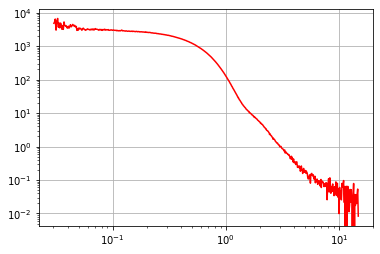

In [44]:
import matplotlib.pyplot as plt
plt.plot(dataframe.q, dataframe.I, color='red')
plt.xscale('log')
plt.yscale('log')
plt.grid()

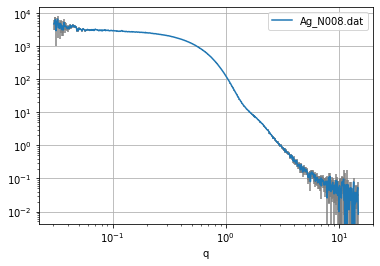

In [52]:
dataframe.plot("q", "I", yerr="uI", loglog=True,
               ecolor="gray", grid=True, label=fnData.name);